In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
load("6_18.RData")
s.genes <- str_to_title(cc.genes$s.genes)
g2m.genes <- str_to_title(cc.genes$g2m.genes)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [3]:
# first scale data on all features

In [2]:
merged_obj <- ScaleData(merged_obj, features = rownames(merged_obj))

Centering and scaling data matrix



In [4]:
merged_obj <- CellCycleScoring(merged_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)


Warning message:
"The following features are not present in the object: Mlf1ip, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Fam64a, Hn1, not searching for symbol synonyms"


In [5]:
# before adjust

Warning message in PrepDR(object = object, features = features, verbose = verbose):
"The following 3 features requested have not been scaled (running reduction without them): Mlf1ip, Fam64a, Hn1"
Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."
PC_ 1 
Positive:  Mki67, Top2a, Birc5, Hmgb2, Cdca8, Cks2, Cks1b, Tpx2, Kif11, Ube2c 
	   Cdca3, Cenpf, Cdk1, Hmmr, Tubb4b, Nusap1, Rrm1, Smc4, Cenpa, Cenpe 
	   Aurkb, Gmnn, Kif20b, Clspn, Ckap2l, Tyms, Ncapd2, Cdc20, Ccnb2, Tmpo 
Negative:  Gas2l3, Ung, Msh2, Chaf1b, Cdca7, Ubr7, Casp8ap2, Ccne2, G2e3, Pold3 
	   Dscc1, Wdr76, Rfc2, Psrc1, Hells, Lbr, Gtse1, Ctcf, Exo1, Dtl 
	   Brip1, Cdc25c, Gins2, Mcm4, Cdc6, Rpa2, Cdc45, Mcm2, Blm, Mcm6 
PC_ 2 
Positive:  Ung, Uhrf1, Mcm6, Hells, Mcm4, Mcm2, Mcm5, Dtl, Tipin, Pcna 
	   Nasp, Atad2, Slbp, Gmnn, Cdca7, Rpa2, Gins2, Prim1, Rrm2, Clspn 
	   Cdc6, Rfc2, Wdr76, Dscc1, Ccne2, Casp8ap2, Rad5

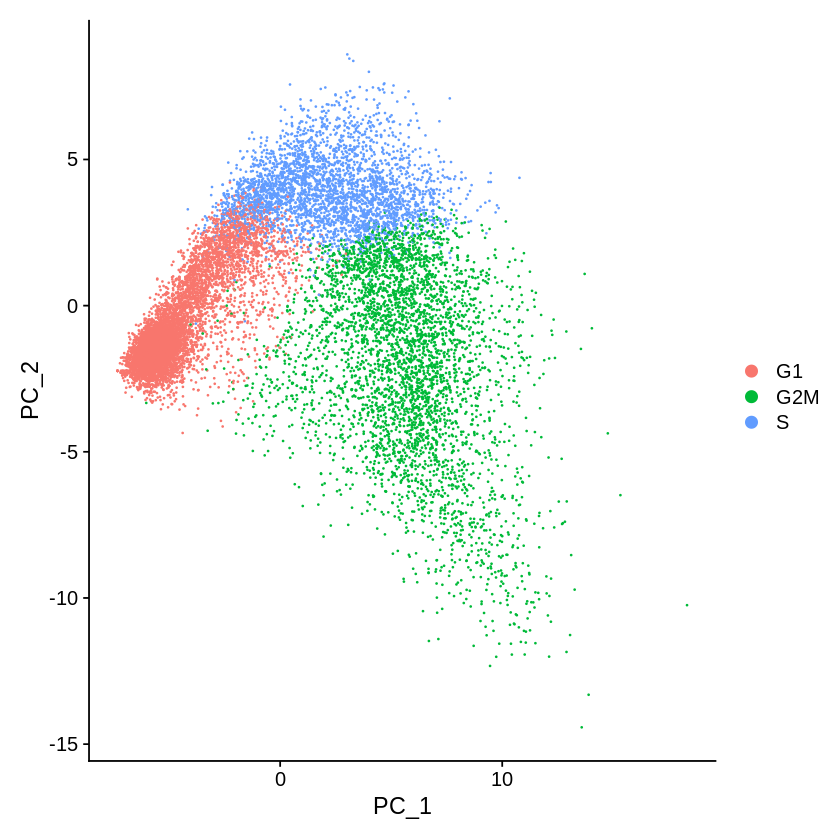

In [6]:
merged_obj <- RunPCA(merged_obj, features = c(s.genes, g2m.genes))
DimPlot(merged_obj,reduction="pca")

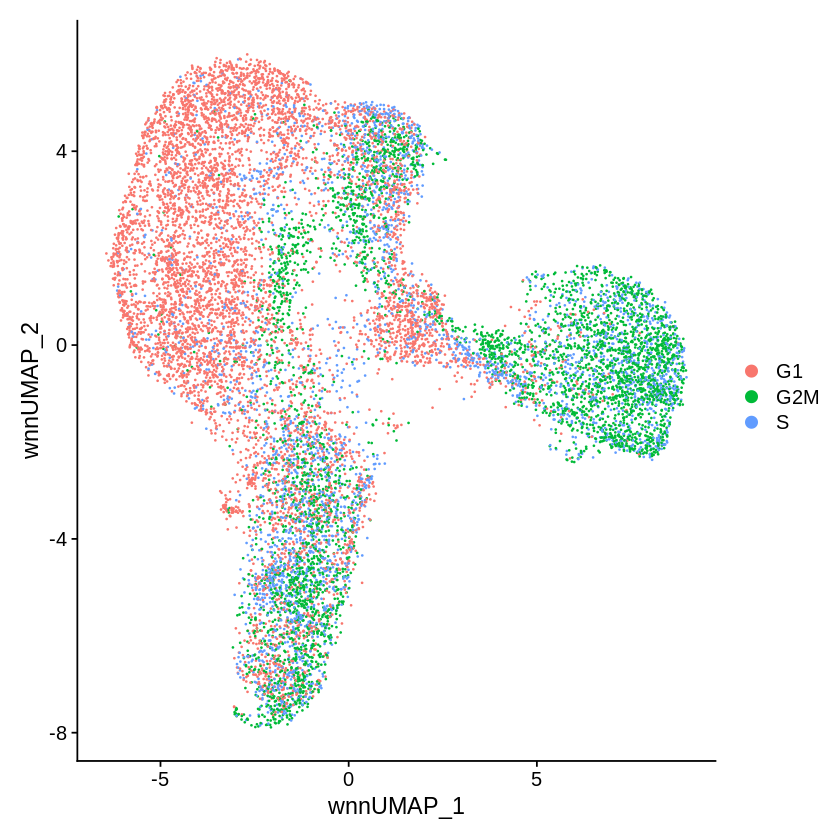

In [8]:
DimPlot(merged_obj,reduction="wnn.umap")

In [10]:
head(merged_obj,n=2)

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1 mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1 mWT        13420      3991         284       
                       nFeature_ADT percent.mt RNA.weight ADT.weight wsnn_res.1
mWT_AAACCCAAGTGATCGG-1 7            5.307631   0.1297299  0.8702701  9         
mWT_AAACCCACAAACCATC-1 8            3.204173   0.0408018  0.9591982  3         
                       seurat_clusters Blood_pred BM_pred                
mWT_AAACCCAAGTGATCGG-1 9               9          9                      
mWT_AAACCCACAAACCATC-1 3               3          Hematopoietic Stem Cell
                       Bone_pred id        S.Score    G2M.Score  Phase
mWT_AAACCCAAGTGATCGG-1 9         reference -0.2647183 -0.2365568 G1   
mWT_AAACCCACAAACCATC-1 3         reference -0.2923569 -0.2442820 G1   
                       old.ident
mWT_AAACCCAAGTGATCGG-1 9        
mWT_AAACCCACAAACCATC-1 3

`summarise()` has grouped output by 'Phase'. You can override using the `.groups` argument.



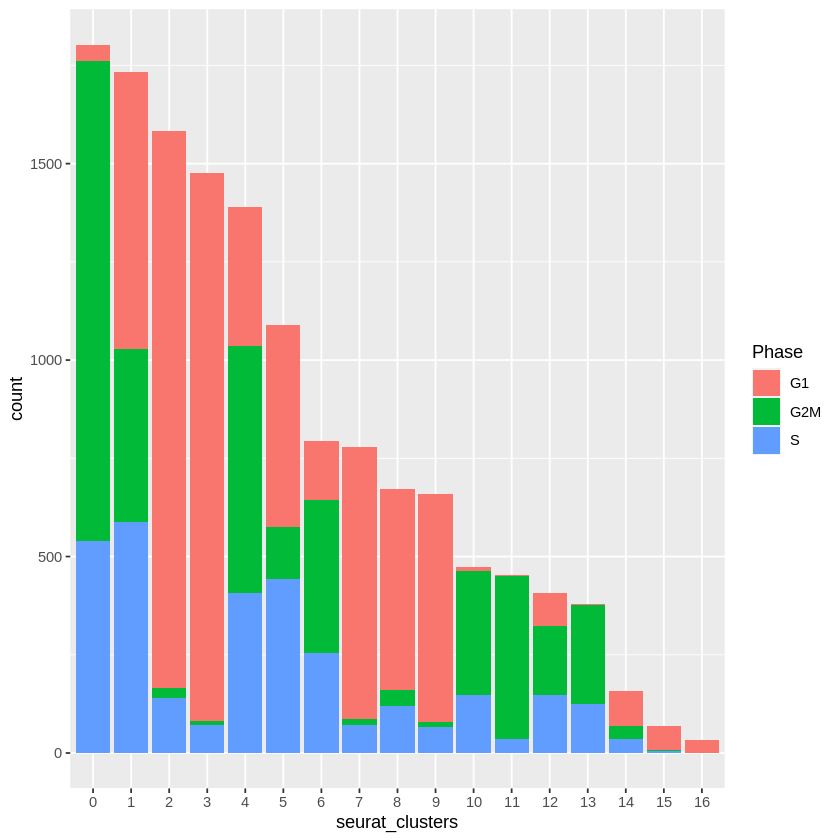

In [11]:
meta.data <- merged_obj[[]]


counts <- group_by(meta.data, Phase, seurat_clusters) %>% summarise(count = n())

ggplot(counts, aes(seurat_clusters, count, fill = Phase)) +
  geom_bar(stat = 'identity')

`summarise()` has grouped output by 'Phase'. You can override using the `.groups` argument.



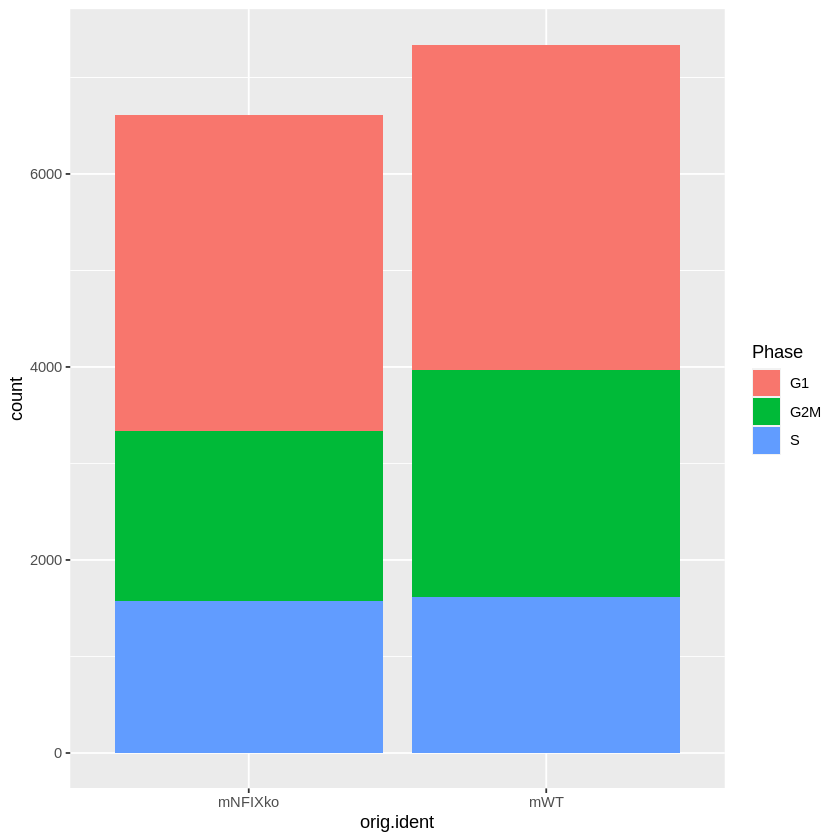

In [12]:
meta.data <- merged_obj[[]]


counts <- group_by(meta.data, Phase, 	orig.ident) %>% summarise(count = n())

ggplot(counts, aes(	orig.ident, count, fill = Phase)) +
  geom_bar(stat = 'identity')

In [7]:
# adjust

In [15]:
# after
merged_obj$CC.Difference <- merged_obj$S.Score - merged_obj$G2M.Score
merged_obj <- ScaleData(merged_obj, vars.to.regress = "CC.Difference",verbose=T,features = rownames(merged_obj),block.size=10000)

Regressing out CC.Difference

Centering and scaling data matrix



Warning message in PrepDR(object = object, features = features, verbose = verbose):
"The following 3 features requested have not been scaled (running reduction without them): Mlf1ip, Fam64a, Hn1"
Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."
PC_ 1 
Positive:  Mki67, Top2a, Birc5, Hmgb2, Cdca8, Gmnn, Rrm1, Cks1b, Clspn, Nasp 
	   Cks2, Ube2c, Atad2, Tpx2, Cenpf, Uhrf1, Kif11, Tyms, Tipin, Rrm2 
	   Cdk1, Mcm5, Cdca3, Hmmr, Tubb4b, Fen1, Mcm6, Smc4, Nusap1, Rad51ap1 
Negative:  Gas2l3, G2e3, Psrc1, Cdc25c, Msh2, Chaf1b, Gtse1, Ctcf, Lbr, Ckap5 
	   Ubr7, Kif23, Ckap2, Ect2, Nek2, Pold3, Casp8ap2, Ung, Ttk, Ccne2 
	   Brip1, Cdca7, Ndc80, Cdca2, Kif2c, Dscc1, Aurka, Hjurp, Wdr76, Blm 
PC_ 2 
Positive:  Cenpa, Ccnb2, Cdc20, Cks2, Nasp, Cdc6, Cdca3, Hmgb2, Anp32e, Mcm4 
	   Mcm2, Slbp, Tubb4b, Fen1, Cenpe, Tipin, Dtl, Ung, Ccne2, Rpa2 
	   Cks1b, Mcm6, Mcm5, Hmmr, Rrm2, Casp8ap2, D

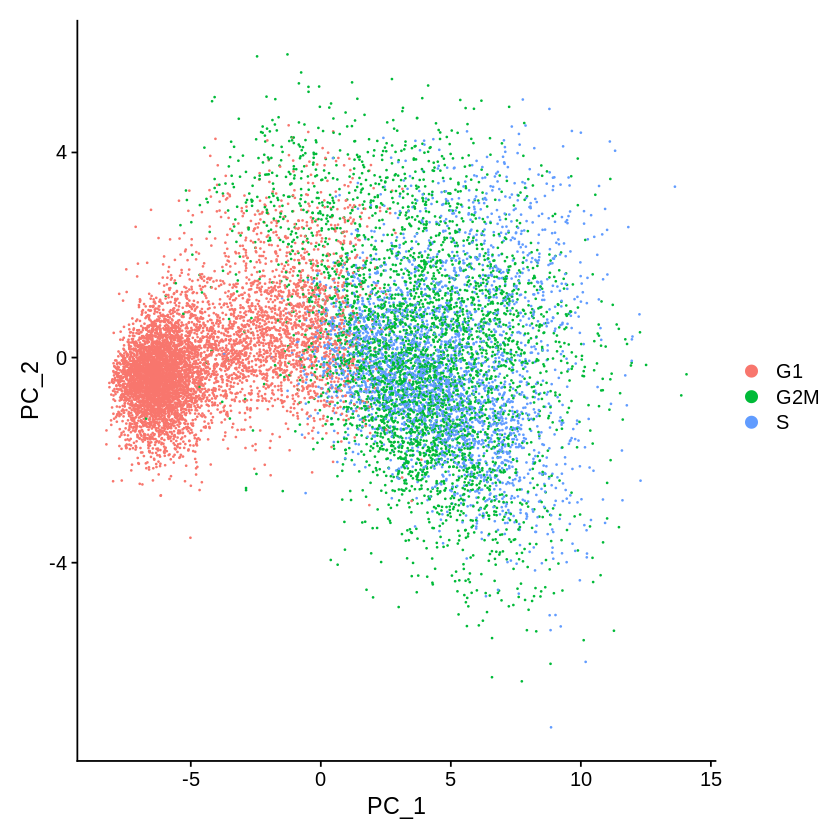

In [16]:
merged_obj <- RunPCA(merged_obj, features = c(s.genes, g2m.genes))
DimPlot(merged_obj,reduction="pca")

In [17]:
save.image("cell_cycle.RData")

PC_ 1 
Positive:  Ermap, Mns1, Rhd, Dut, Klf1, Car1, C1qtnf12, Blvrb, Mt1, Cldn13 
	   Glrx5, Mt2, Tmem14c, Mki67, Birc5, Sphk1, Hmbs, Nxpe2, Cpox, Cenpa 
	   Aqp1, Add2, Hmgb2, Cks2, Hspd1, Rgs10, Slc25a21, Slc38a5, Smim1, Nasp 
Negative:  Ifitm1, Tmsb4x, Hlf, Myl10, Angpt1, Coro1a, Ly6a, Gcnt2, Ifi203, Gimap1 
	   Mecom, Hacd4, Sox4, Ctla2a, Adgrl4, Srgn, Ltb, Arpc1b, Cd63, Sptbn1 
	   Gimap6, Pkm, Lyz2, Mef2c, Limd2, Lsp1, Sh3bgrl3, Gng11, Rbp1, Slc18a2 
PC_ 2 
Positive:  Ctsg, Mpo, Elane, Ms4a3, Clec12a, Hp, Anxa3, Atp8b4, Igsf6, Ly6c2 
	   Plac8, Prtn3, Alas1, Prss57, F630028O10Rik, Serpinb1a, Trem3, Slpi, Nkg7, Pgam1 
	   Tyrobp, Cst7, Ap3s1, Sdf2l1, Rab44, Calr, Fcgr3, Cebpe, Pglyrp1, Msrb1 
Negative:  Car2, Vamp5, Zfpm1, Fth1, Blvrb, Mrpl52, Mllt3, Car1, Abcb4, Aqp1 
	   Nfia, Ermap, Aplp2, Klf1, Tspo2, Ces2g, Bex4, Aldh1a1, Gfi1b, Spire1 
	   Hlf, Angpt1, Gstm5, Prdx2, Hacd4, Rhd, Mt2, Gm15915, Tspan33, C1qtnf12 
PC_ 3 
Positive:  Ftl1, Cd24a, S100a8, Ifngr1, Trem3, Rgcc, Erma

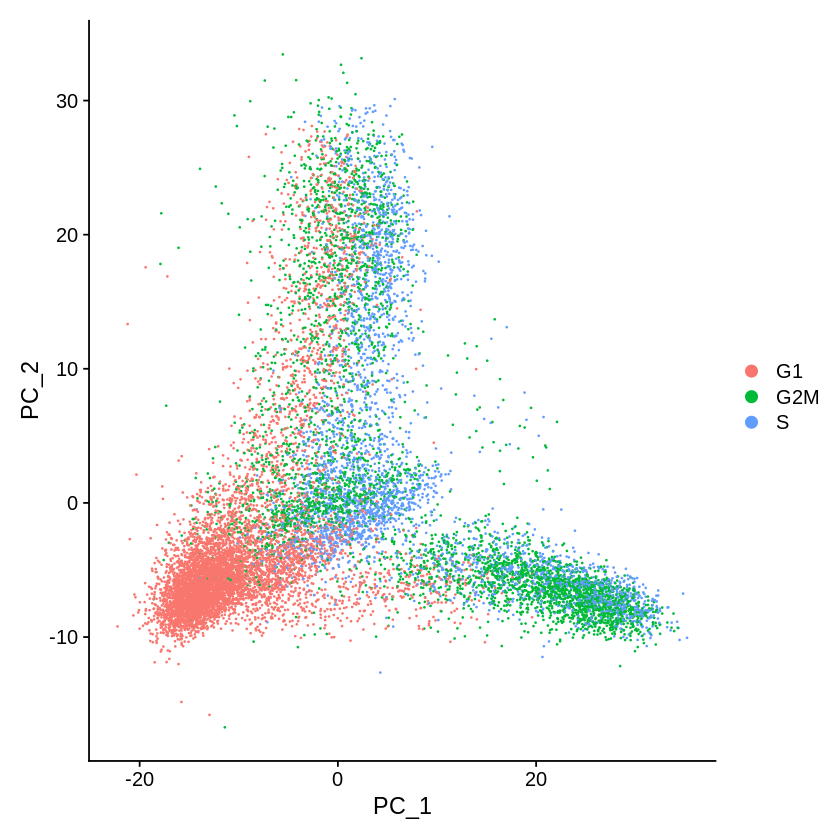

In [19]:
merged_obj <- RunPCA(merged_obj,features = VariableFeatures(merged_obj))
DimPlot(merged_obj,reduction="pca")

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(merged_obj, reduction.list = list("pca", :
"The number of provided modality.weight.name is not equal to the number of modalities. RNA.weight ADT.weight are used to store the modality weights"
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
02:22:00 UMAP embedding parameters a = 0.9922 b = 1.112

02:22:00 Commencing smooth kNN distance calibration using 1 thread

02:22:01 Initializing from normalized Laplacian + noise

02:22:01 Commencing optimization for 200 epochs, with 417510 positive edg

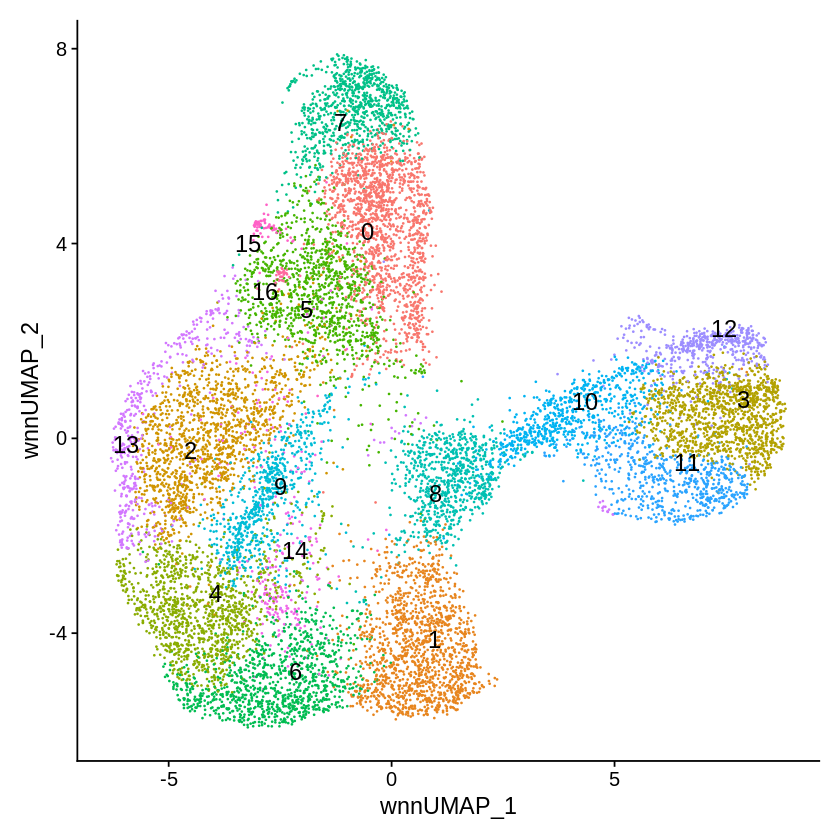

In [21]:
merged_obj <- FindMultiModalNeighbors(
  merged_obj, reduction.list = list("pca", "apca"), 
  dims.list = list(1:50, 1:7), modality.weight.name = "RNA.weight"
)
merged_obj <- RunUMAP(merged_obj, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
merged_obj <- FindClusters(merged_obj, graph.name = "wsnn", algorithm = 3, resolution = 1, verbose = FALSE)
DimPlot(merged_obj, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 5) + NoLegend()


In [23]:
head(merged_obj,n=2)

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1 mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1 mWT        13420      3991         284       
                       nFeature_ADT percent.mt RNA.weight ADT.weight wsnn_res.1
mWT_AAACCCAAGTGATCGG-1 7            5.307631   0.1845399  0.8154601  9         
mWT_AAACCCACAAACCATC-1 8            3.204173   0.1674872  0.8325128  4         
                       seurat_clusters Blood_pred BM_pred                
mWT_AAACCCAAGTGATCGG-1 9               9          9                      
mWT_AAACCCACAAACCATC-1 4               3          Hematopoietic Stem Cell
                       Bone_pred id        S.Score    G2M.Score  Phase
mWT_AAACCCAAGTGATCGG-1 9         reference -0.2647183 -0.2365568 G1   
mWT_AAACCCACAAACCATC-1 3         reference -0.2923569 -0.2442820 G1   
                       old.ident CC.Difference
mWT_AAACCCAAGTGATCGG-1 9         -0.02816149  
mWT_AAACCCACAAACCATC-1 3         -0.04807486

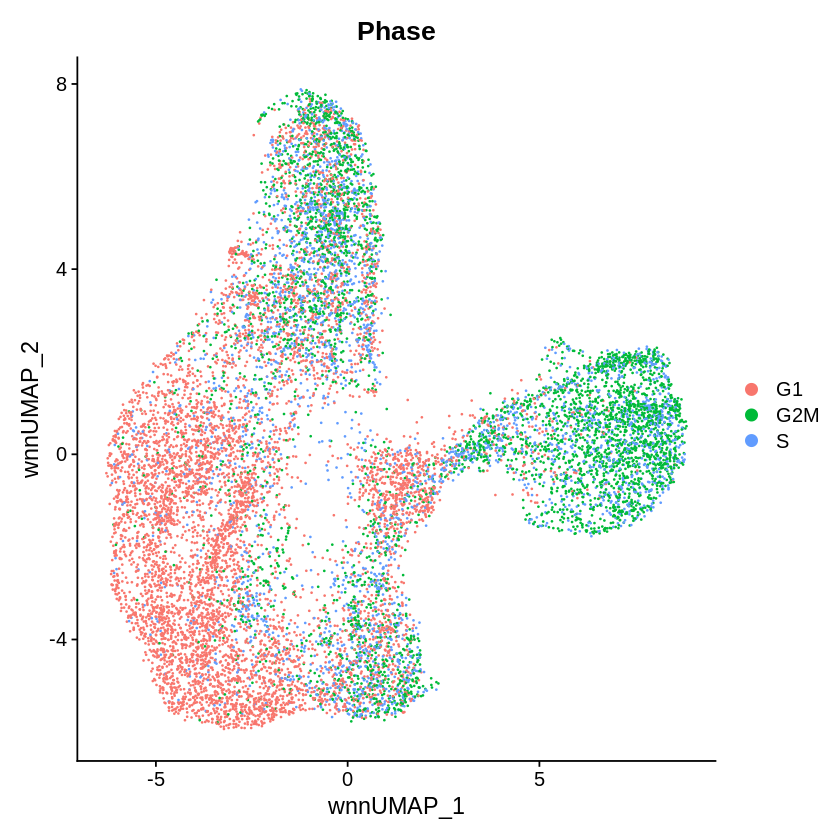

In [24]:
DimPlot(merged_obj, reduction = 'wnn.umap', group.by="Phase") 

Warning message:
"Could not find Sca1-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD150-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD48-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD16-32-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD105-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD41-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD71-TotalA in the default search locations, found in ADT assay instead"
Warning message:
"Could not find CD34-TotalA in the default search locations, found in ADT assay instead"


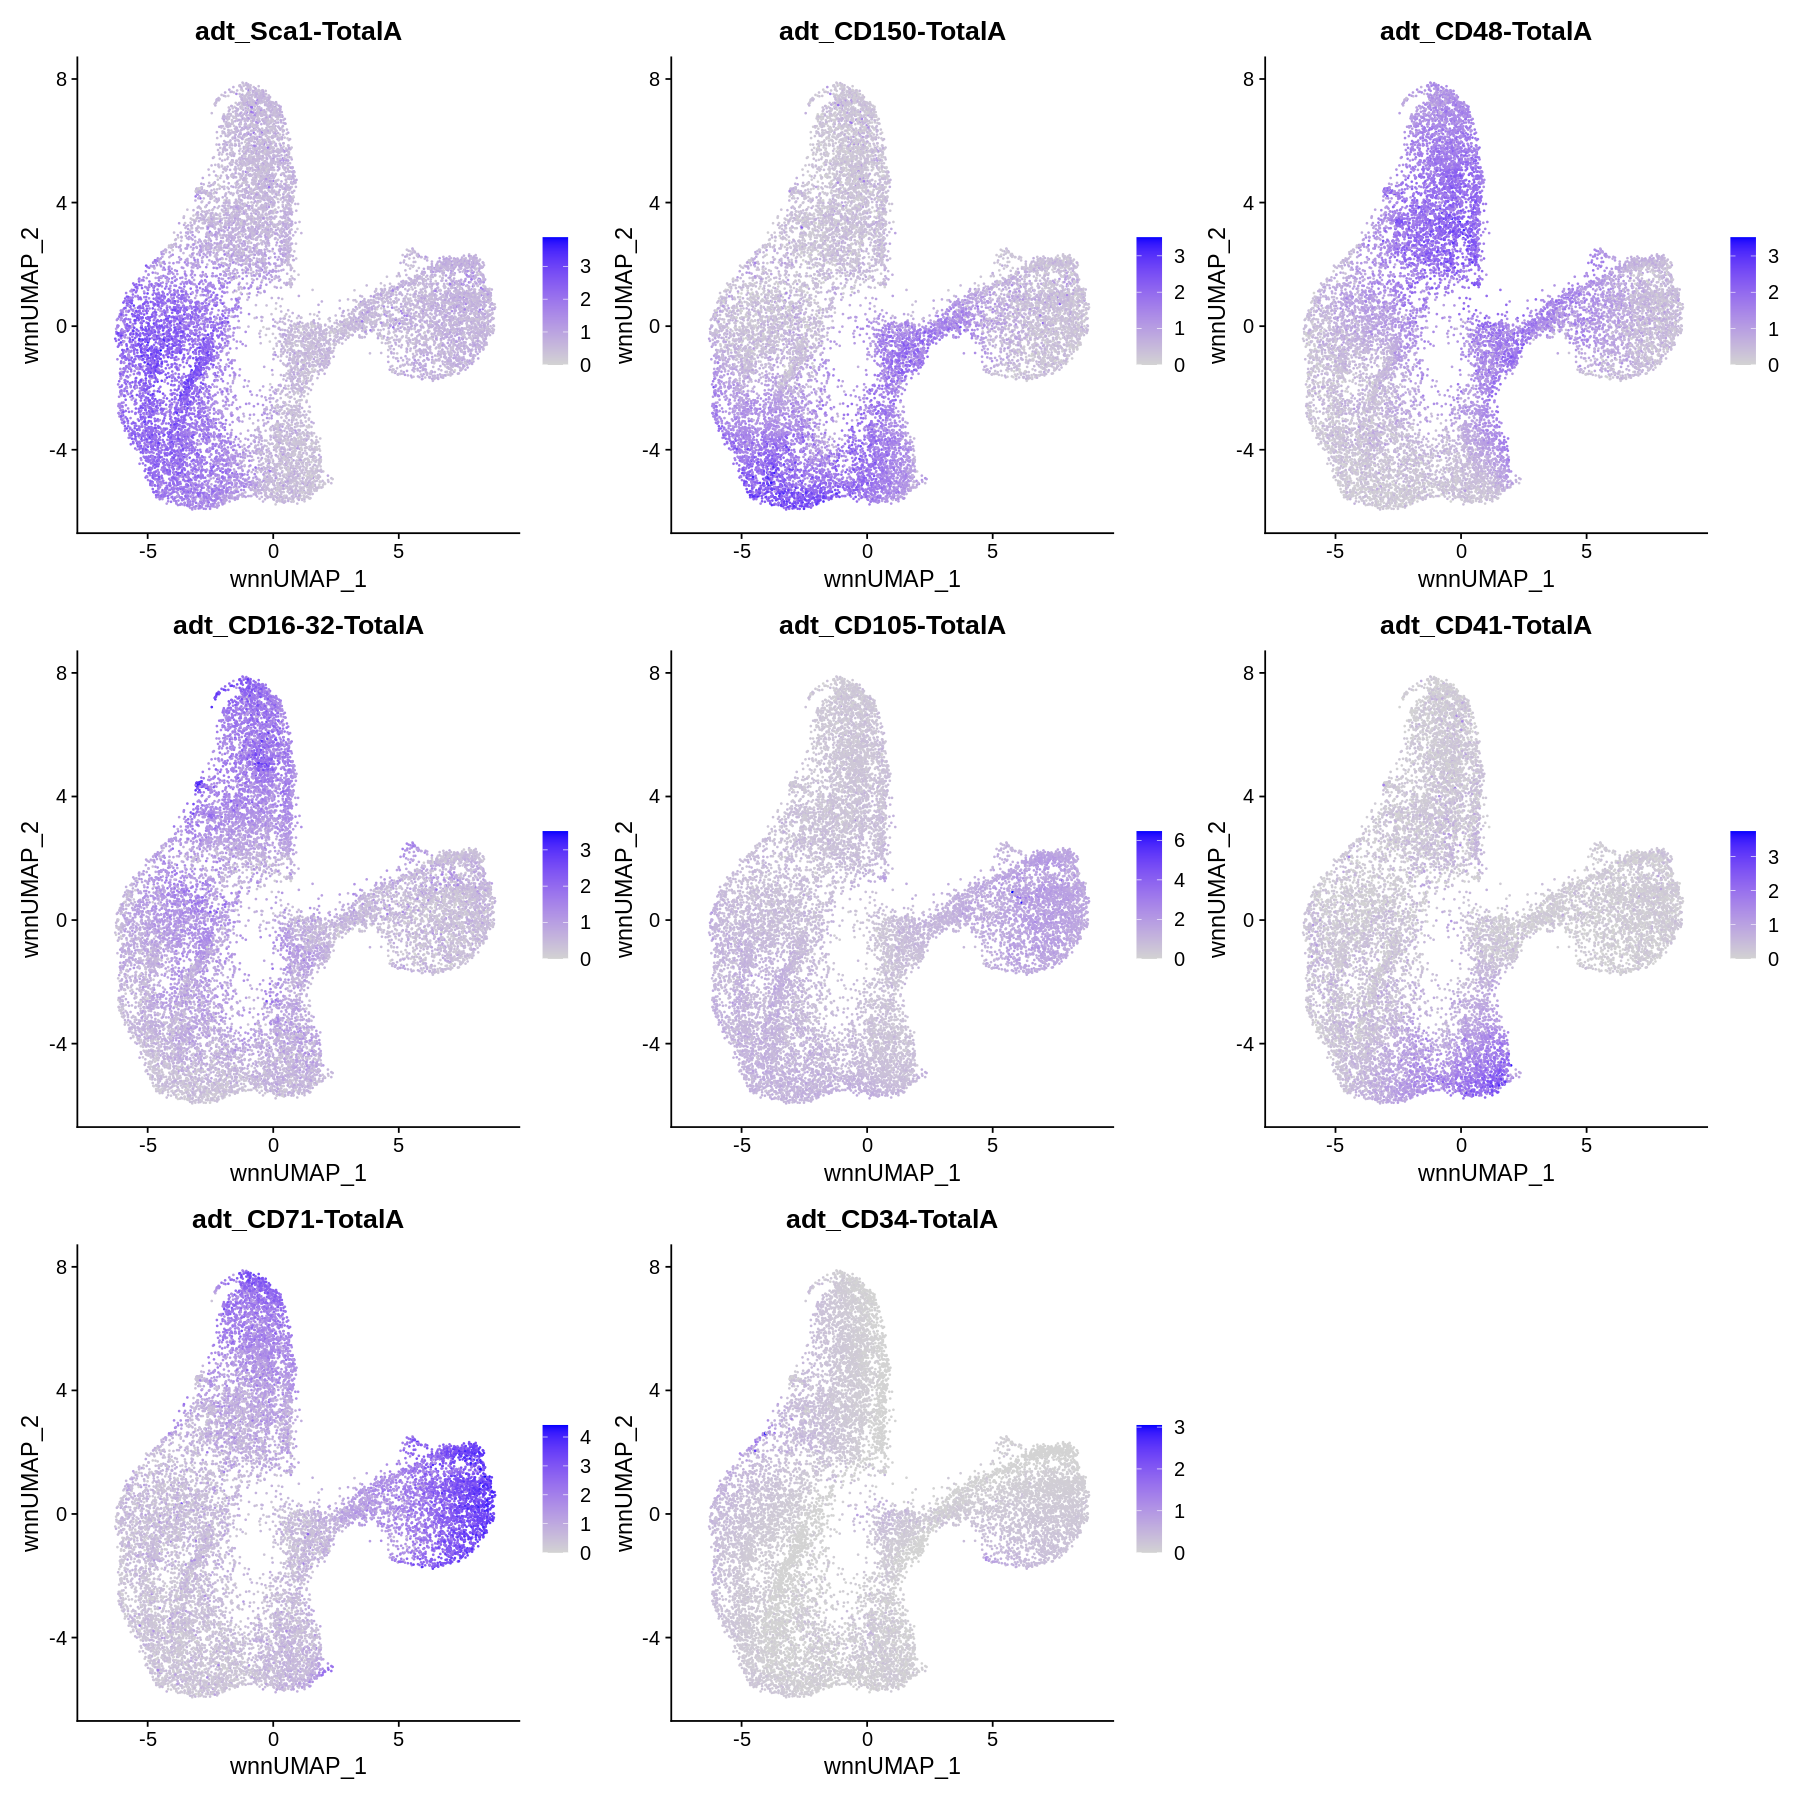

In [25]:
options(repr.plot.width = 15, repr.plot.height = 15)
FeaturePlot(merged_obj, features = rownames(merged_obj@assays$ADT@meta.features), reduction = 'wnn.umap')